# Lockman SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
37d9c0f (Tue Jul 18 17:43:07 2017 +0100) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
#SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
SUFFIX = "_20170710"

master_catalogue = Table.read("{}/master_catalogue_lockman-swire{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

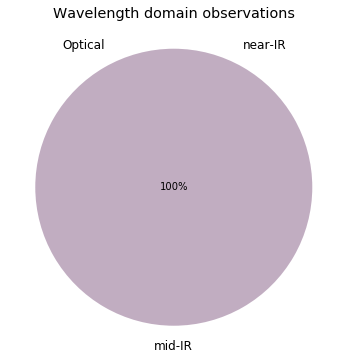

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

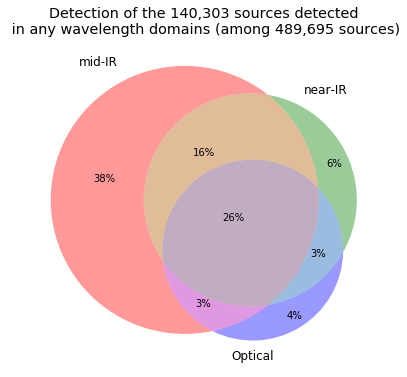

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u",          "CFHT Megacam u"]
g_bands = ["WFC g", "RCS g", "CFHT Megacam g",  "GPC1 g"]
r_bands = ["WFC r", "RCS r", "CFHT Megacam r",  "GPC1 r"]
i_bands = ["WFC i", "RCS i",                    "GPC1 i"]
z_bands = ["WFC z", "RCS z", "CFHT Megacam z",  "GPC1 z"]
y_bands = [         "RCS y",                    "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

HELP warning: One or more of the columns is empty.


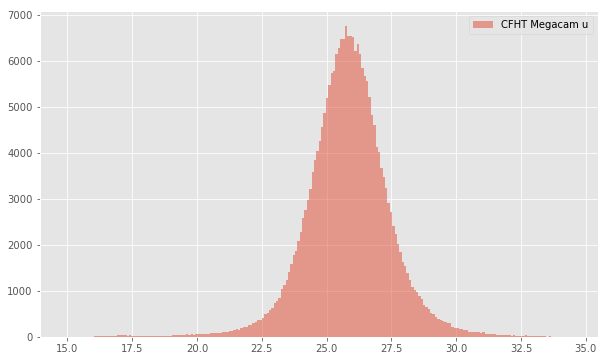

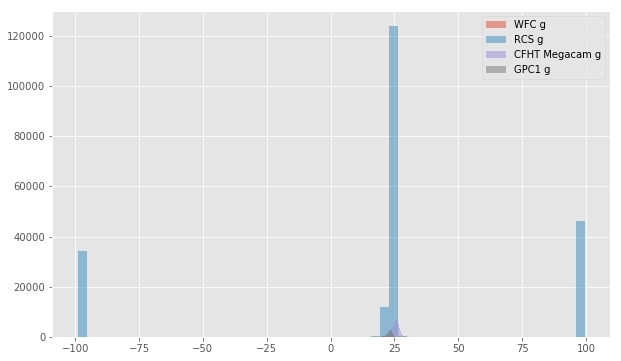

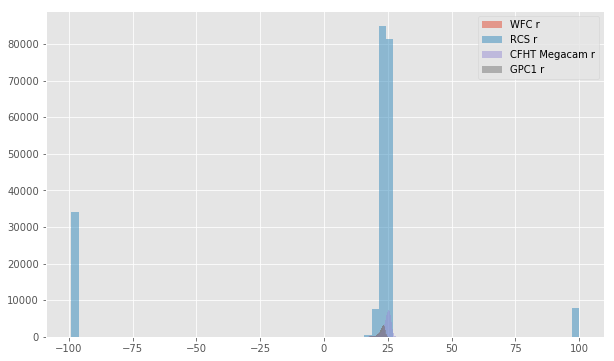

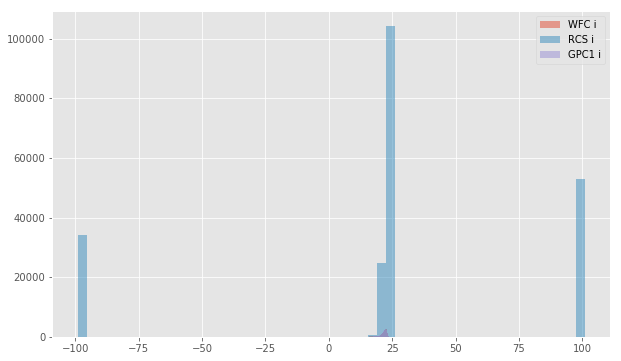

HELP warning: One or more of the columns is empty.


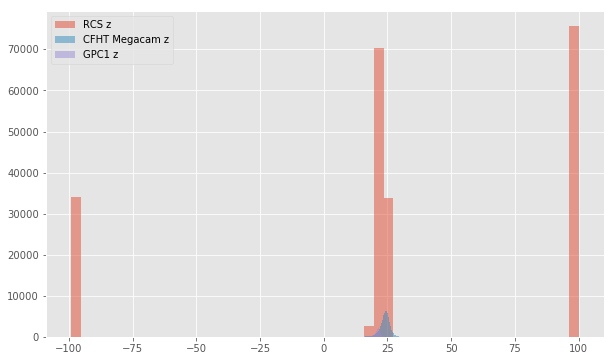

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/stats/histogram.py:149: RuntimeWarning: invalid value encountered in true_divide
  Nbins = np.ceil((data.max() - data.min()) / dx)


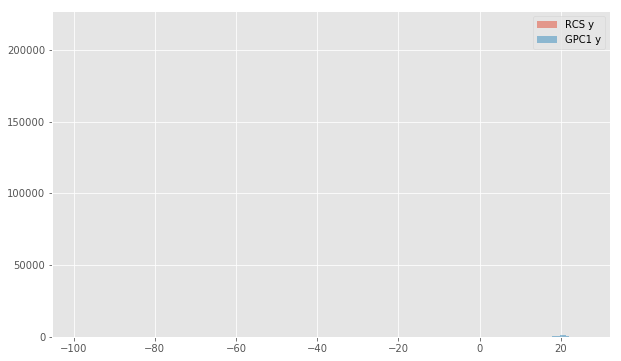

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
RCS g (total) - WFC g (total):
- Median: -0.12
- Median Absolute Deviation: 0.29
- 1% percentile: -123.29591766357422
- 99% percentile: 78.49364074707032


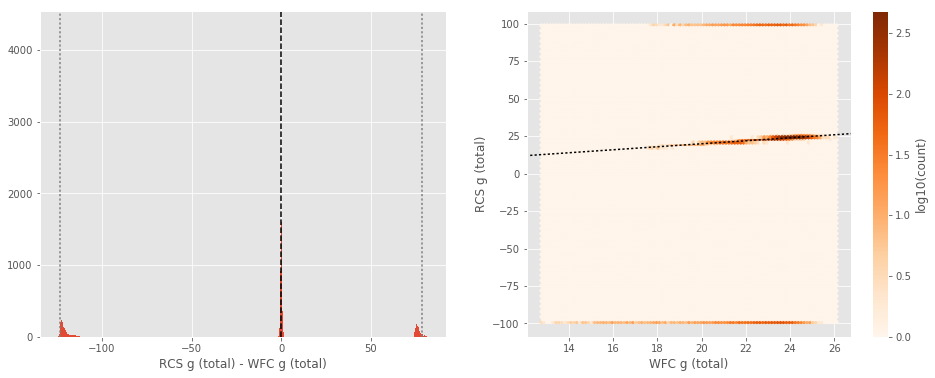

CFHT Megacam g (aperture) - WFC g (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.13
- 1% percentile: -0.4238215446472168
- 99% percentile: 0.8451940917968817


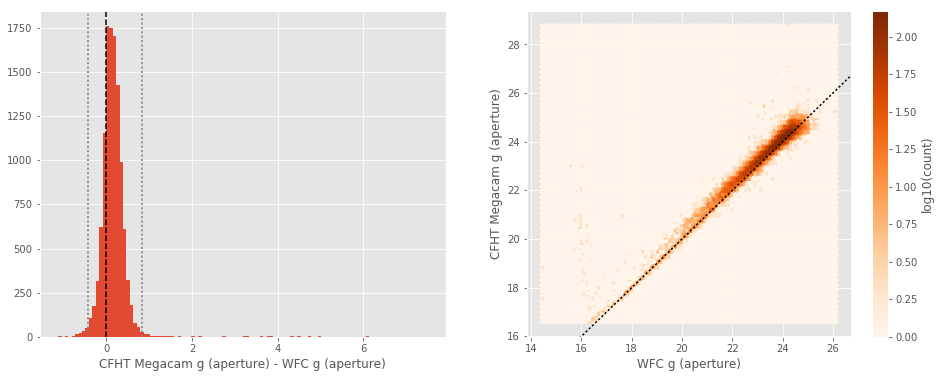

CFHT Megacam g (total) - WFC g (total):
- Median: -0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8807334899902344
- 99% percentile: 1.4448719406127906


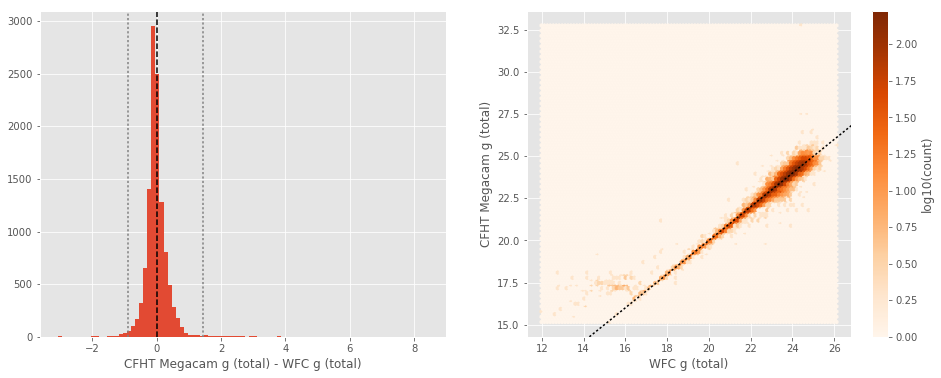

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.27
- 1% percentile: -1.582408561706543
- 99% percentile: 2.7675101852416875


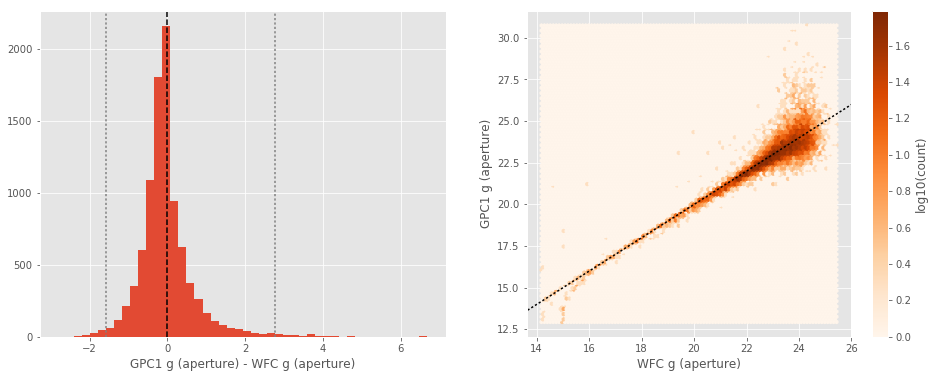

GPC1 g (total) - WFC g (total):
- Median: -0.06
- Median Absolute Deviation: 0.21
- 1% percentile: -1.795256576538086
- 99% percentile: 0.9178110504150395


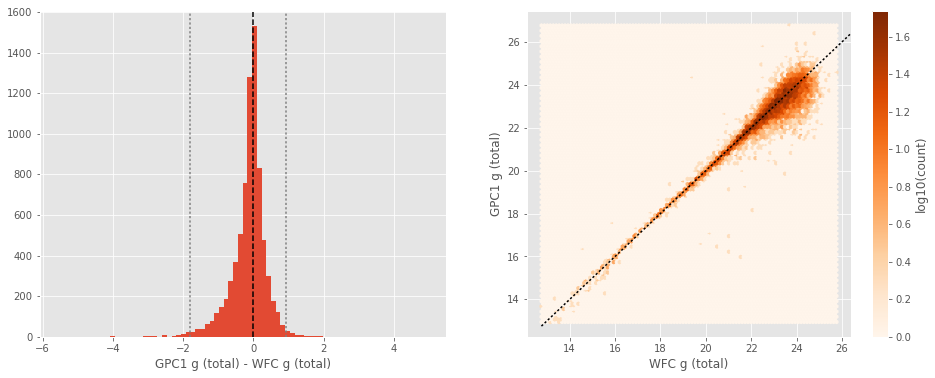

There are no overlapping magnitudes...
CFHT Megacam g (total) - RCS g (total):
- Median: 0.02
- Median Absolute Deviation: 0.30
- 1% percentile: -76.89899665832519
- 99% percentile: 124.18520736694336


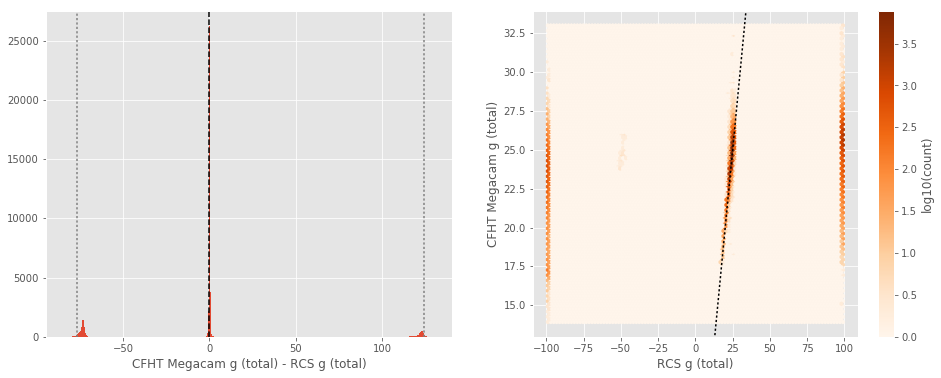

There are no overlapping magnitudes...
GPC1 g (total) - RCS g (total):
- Median: 0.02
- Median Absolute Deviation: 0.66
- 1% percentile: -78.64409980773925
- 99% percentile: 123.07182006835937


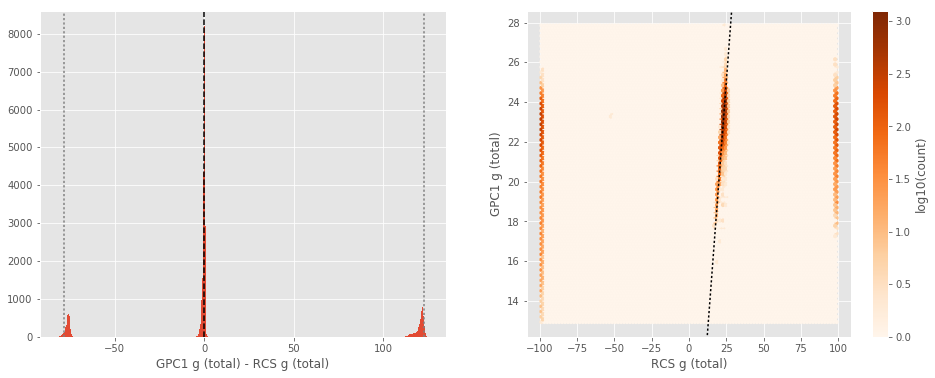

GPC1 g (aperture) - CFHT Megacam g (aperture):
- Median: -0.37
- Median Absolute Deviation: 0.47
- 1% percentile: -3.0639435768127443
- 99% percentile: 2.8351202583312984


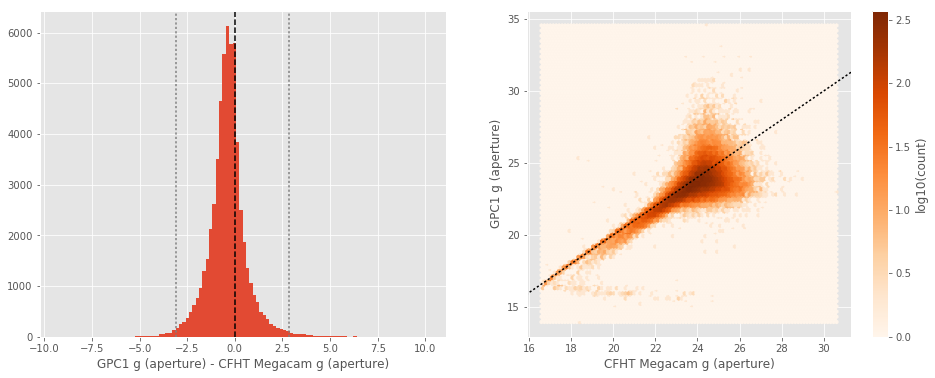

GPC1 g (total) - CFHT Megacam g (total):
- Median: -0.07
- Median Absolute Deviation: 0.31
- 1% percentile: -3.48842830657959
- 99% percentile: 0.9194593429565413


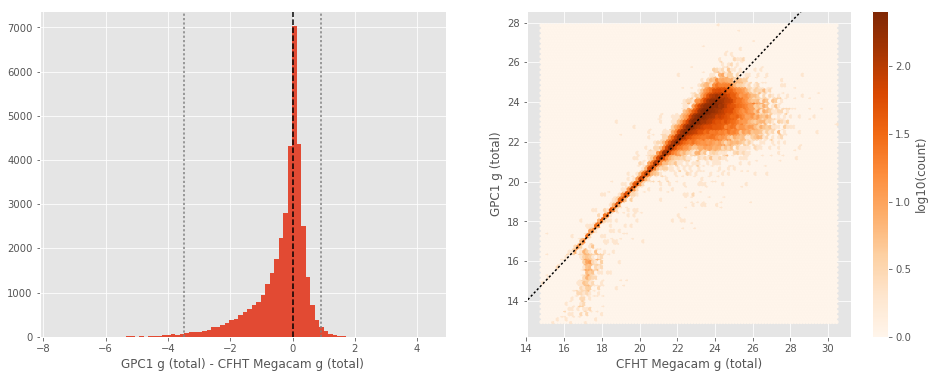

There are no overlapping magnitudes...
RCS r (total) - WFC r (total):
- Median: -0.19
- Median Absolute Deviation: 0.20
- 1% percentile: -122.74084739685058
- 99% percentile: 0.7716640472412096


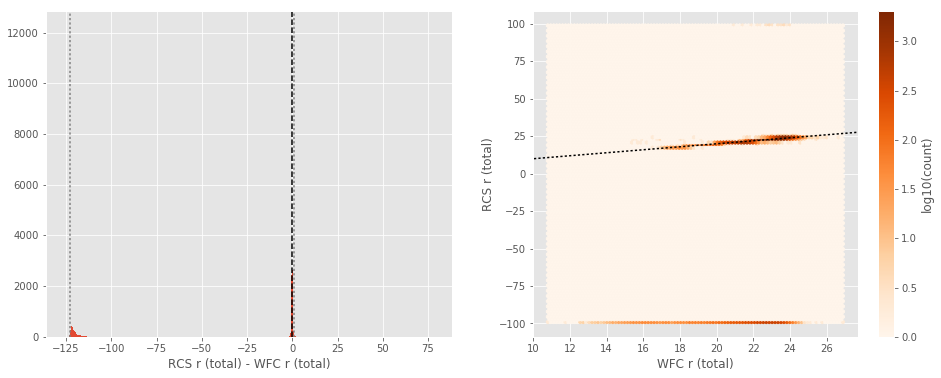

CFHT Megacam r (aperture) - WFC r (aperture):
- Median: 0.17
- Median Absolute Deviation: 0.14
- 1% percentile: -0.4225832176208496
- 99% percentile: 1.0953512573242212


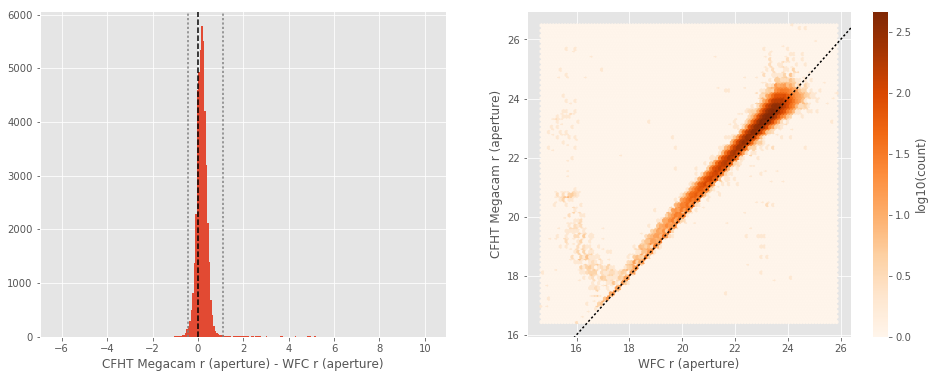

CFHT Megacam r (total) - WFC r (total):
- Median: -0.08
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8634931945800781
- 99% percentile: 1.456328201293941


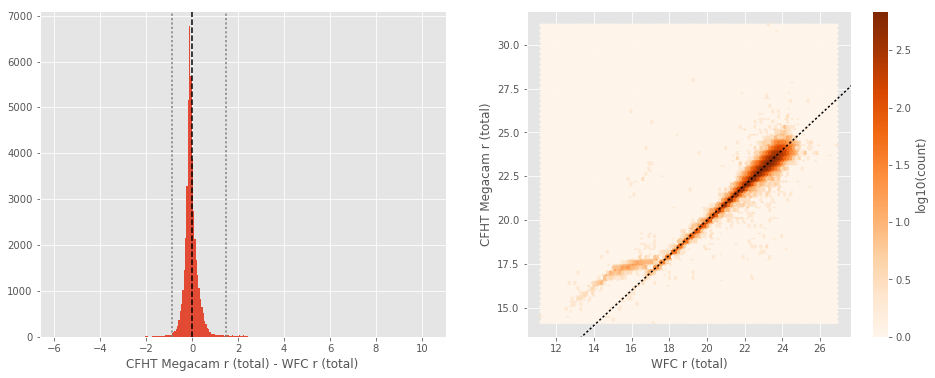

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.05
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0979535102844238
- 99% percentile: 1.933654499053953


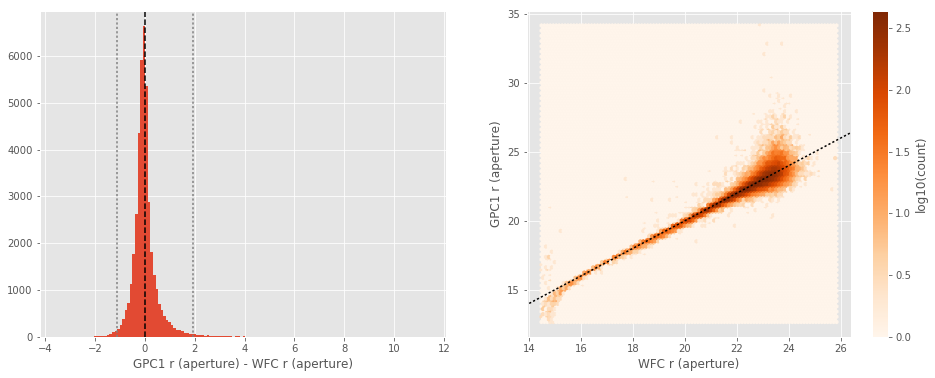

GPC1 r (total) - WFC r (total):
- Median: 0.02
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3568561553955079
- 99% percentile: 1.0044033050537118


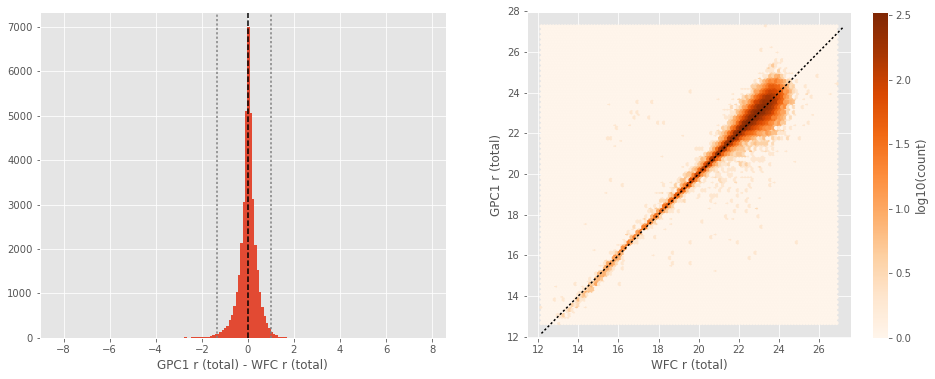

There are no overlapping magnitudes...
CFHT Megacam r (total) - RCS r (total):
- Median: 0.10
- Median Absolute Deviation: 0.20
- 1% percentile: -73.72882568359375
- 99% percentile: 123.58253662109375


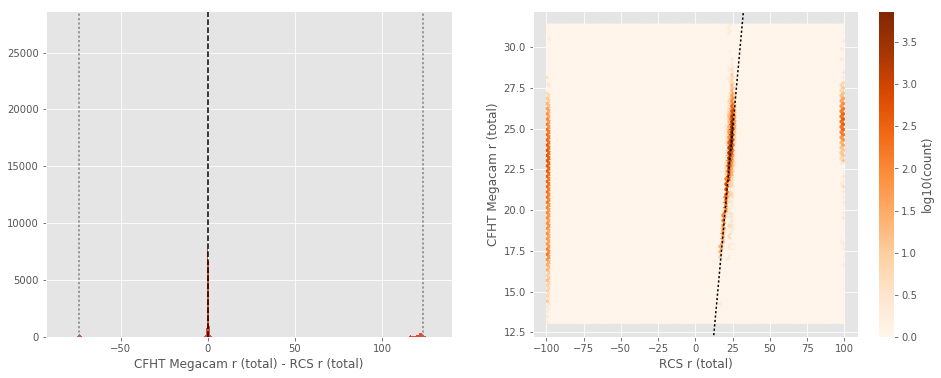

There are no overlapping magnitudes...
GPC1 r (total) - RCS r (total):
- Median: 0.18
- Median Absolute Deviation: 0.31
- 1% percentile: -1.9619819259643554
- 99% percentile: 122.88794691085815


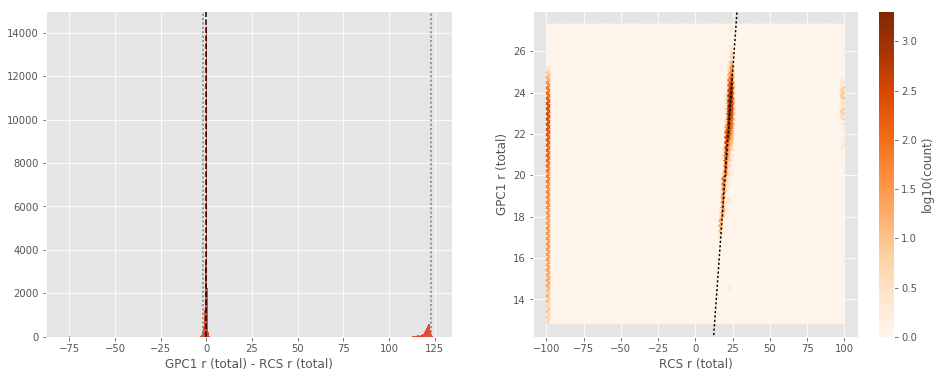

GPC1 r (aperture) - CFHT Megacam r (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.32
- 1% percentile: -2.35339469909668
- 99% percentile: 2.277881469726567


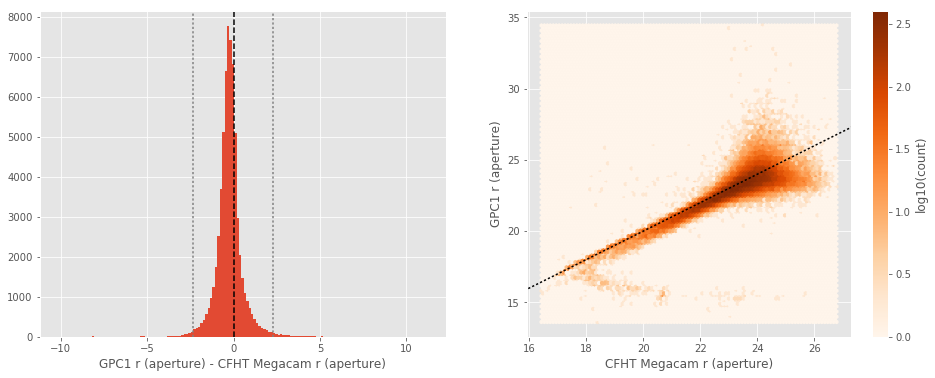

GPC1 r (total) - CFHT Megacam r (total):
- Median: 0.05
- Median Absolute Deviation: 0.22
- 1% percentile: -2.533848762512207
- 99% percentile: 0.9905638694763184


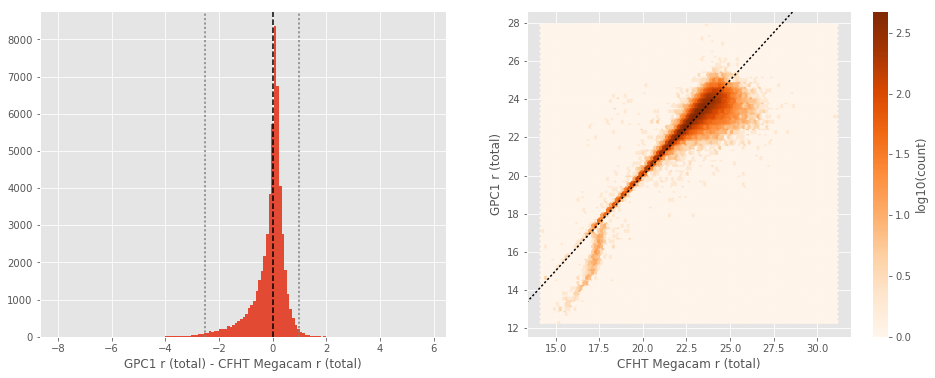

There are no overlapping magnitudes...
RCS i (total) - WFC i (total):
- Median: -0.06
- Median Absolute Deviation: 0.44
- 1% percentile: -122.02751014709473
- 99% percentile: 80.20901962280274


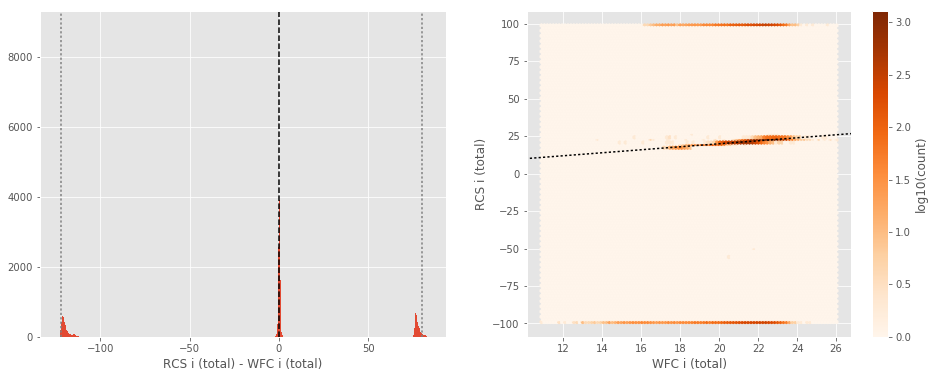

GPC1 i (aperture) - WFC i (aperture):
- Median: 0.00
- Median Absolute Deviation: 0.21
- 1% percentile: -1.030916004180908
- 99% percentile: 2.4249460601806567


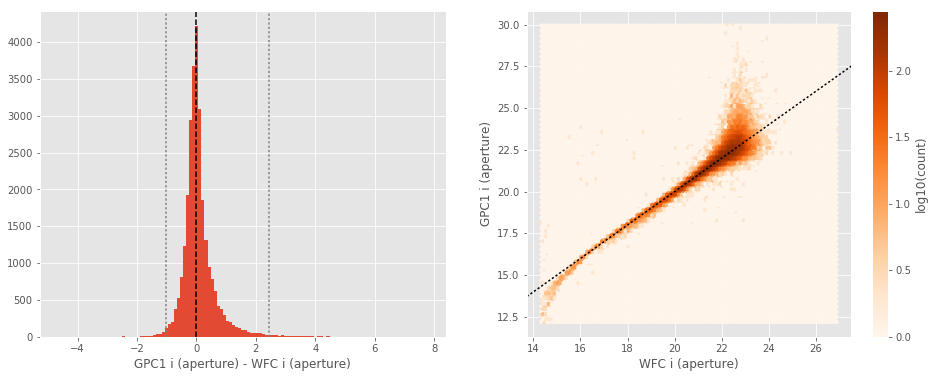

GPC1 i (total) - WFC i (total):
- Median: 0.09
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9489575576782227
- 99% percentile: 1.2434468460083


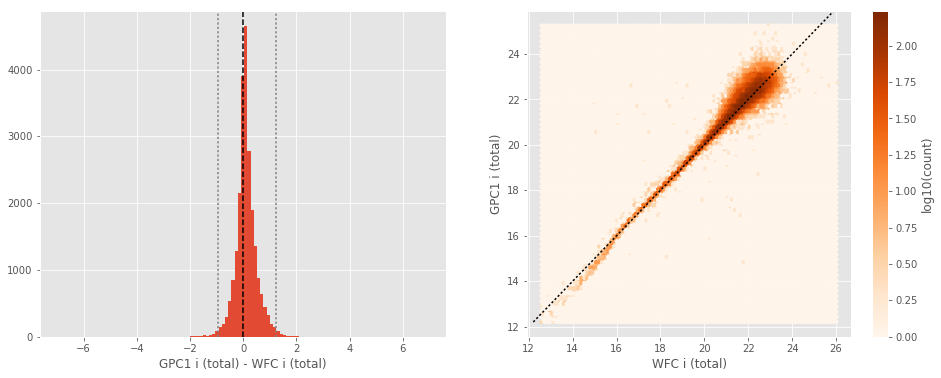

There are no overlapping magnitudes...
GPC1 i (total) - RCS i (total):
- Median: 0.17
- Median Absolute Deviation: 0.42
- 1% percentile: -80.48845052719116
- 99% percentile: 121.9639799118042


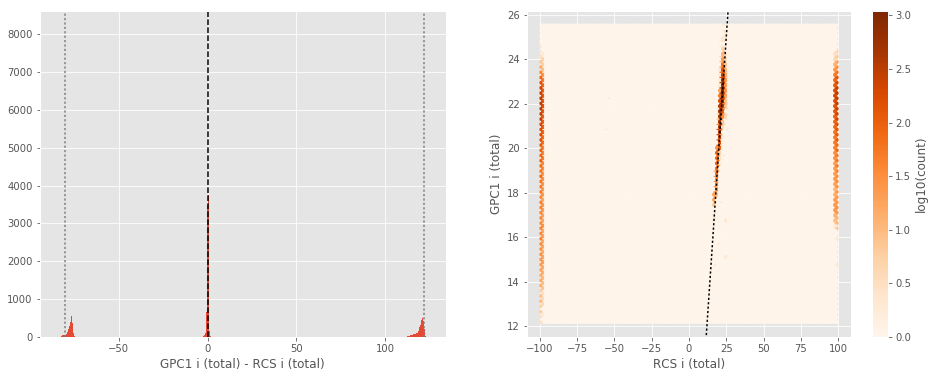

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
CFHT Megacam z (total) - RCS z (total):
- Median: -0.11
- Median Absolute Deviation: 0.85
- 1% percentile: -78.54137634277345
- 99% percentile: 123.06756927490234


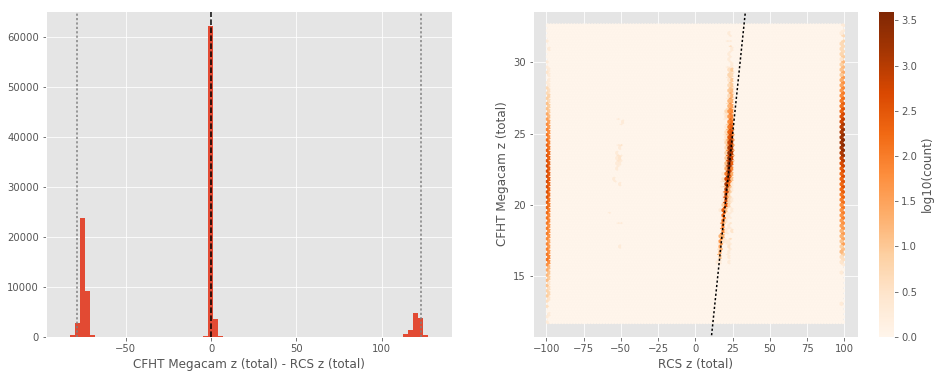

There are no overlapping magnitudes...
GPC1 z (total) - RCS z (total):
- Median: 0.18
- Median Absolute Deviation: 0.42
- 1% percentile: -80.54318281173705
- 99% percentile: 121.19618234634399


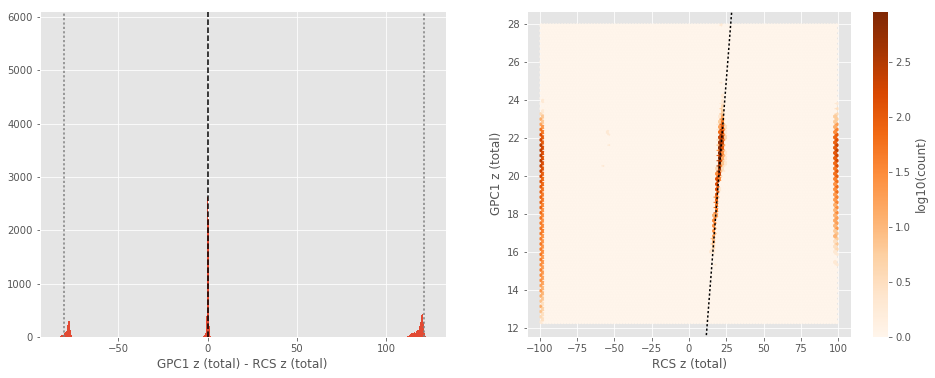

GPC1 z (aperture) - CFHT Megacam z (aperture):
- Median: -0.23
- Median Absolute Deviation: 0.36
- 1% percentile: -2.5429624366760257
- 99% percentile: 2.9950840759277293


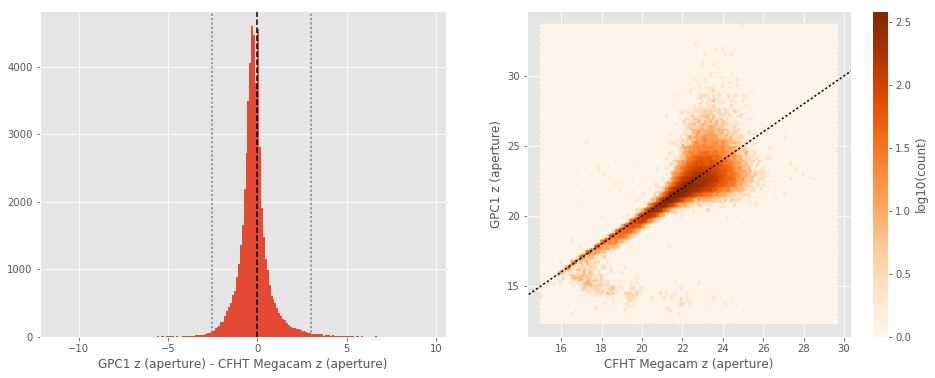

GPC1 z (total) - CFHT Megacam z (total):
- Median: 0.12
- Median Absolute Deviation: 0.16
- 1% percentile: -1.8101123046874998
- 99% percentile: 0.9338863563537578


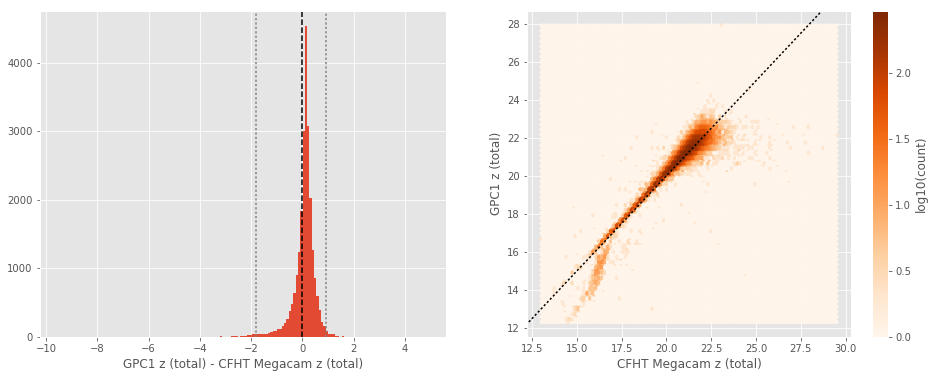

There are no overlapping magnitudes...
GPC1 y (total) - RCS y (total):
- Median: 119.15
- Median Absolute Deviation: 0.72
- 1% percentile: 113.22222366333008
- 99% percentile: 120.88075988769532


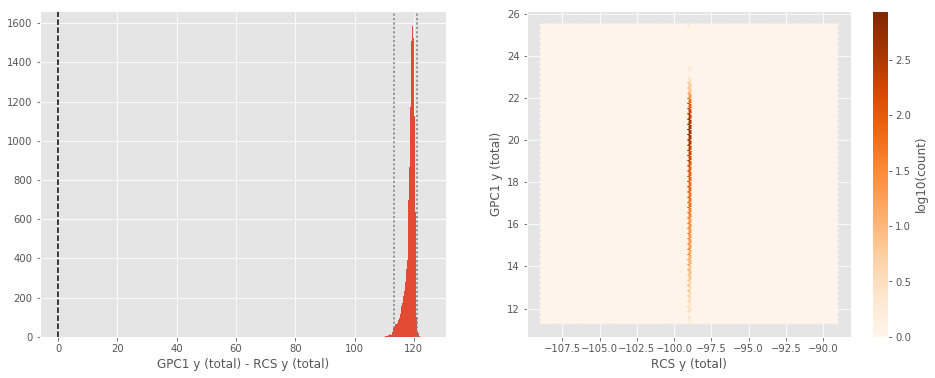

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Lockman-SWIRE.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

There are no overlapping magnitudes...
There are no overlapping magnitudes...
CFHT Megacam u (aperture) - SDSS u (fiberMag):
- Median: 0.08
- Median Absolute Deviation: 0.54
- 1% percentile: -1.6548362731933595
- 99% percentile: 3.1933302307128923


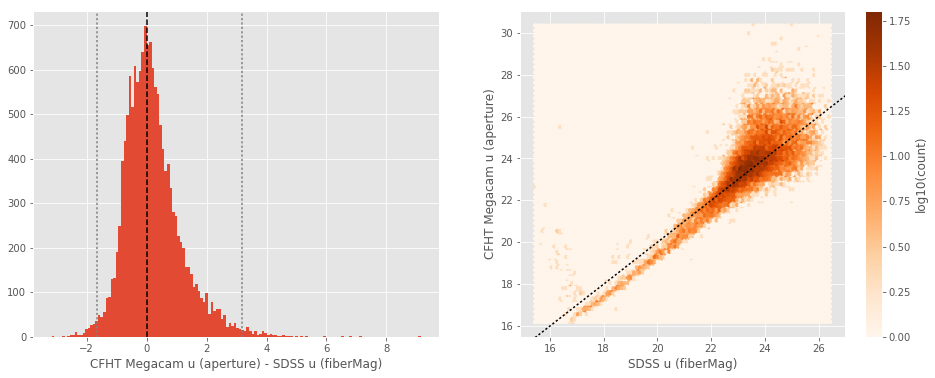

CFHT Megacam u (total) - SDSS u (petroMag):
- Median: 0.08
- Median Absolute Deviation: 0.54
- 1% percentile: -1.6548362731933595
- 99% percentile: 3.1933302307128923


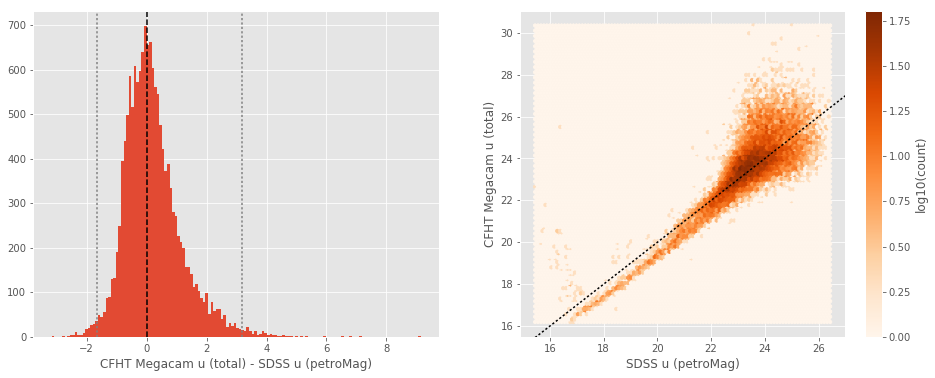

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0213998413085938
- 99% percentile: 0.34259757995605455


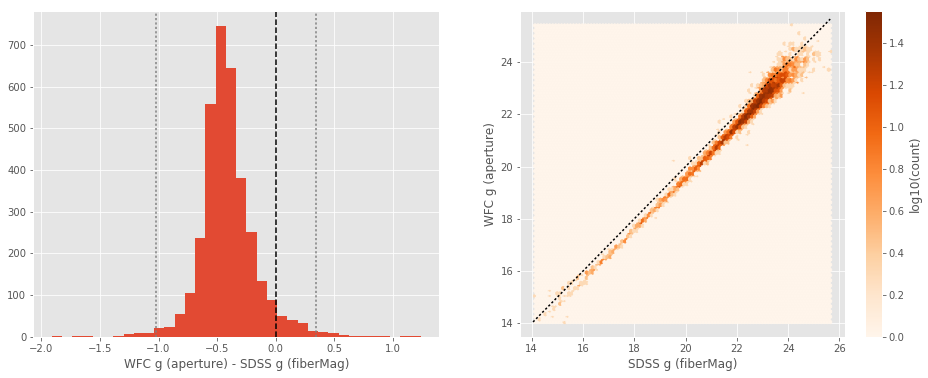

WFC g (total) - SDSS g (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0213998413085938
- 99% percentile: 0.34259757995605455


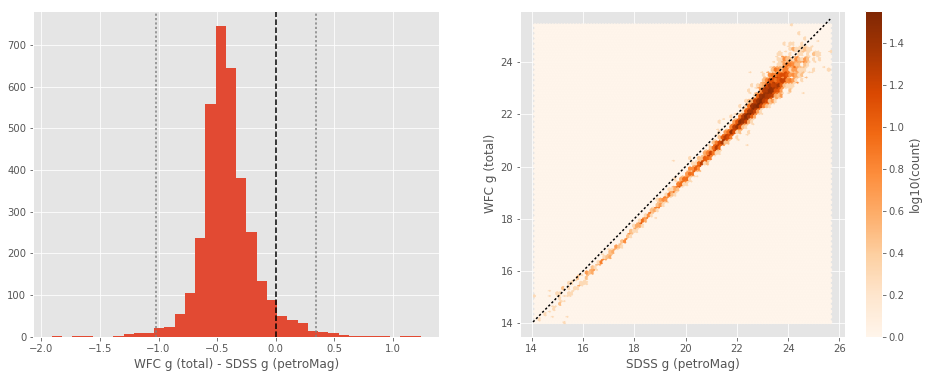

There are no overlapping magnitudes...
There are no overlapping magnitudes...
CFHT Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.25
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0347560882568358
- 99% percentile: 1.2940634155273434


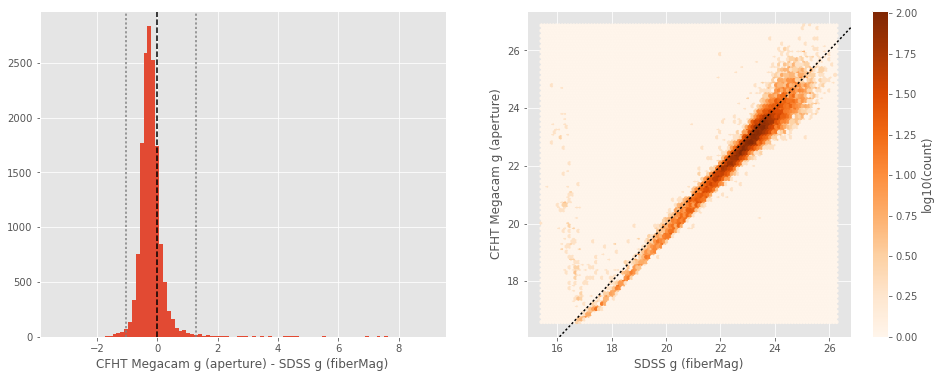

CFHT Megacam g (total) - SDSS g (petroMag):
- Median: -0.25
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0347560882568358
- 99% percentile: 1.2940634155273434


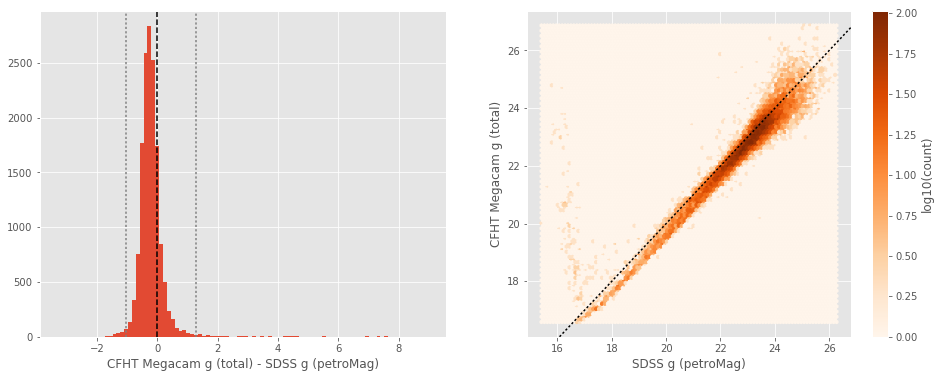

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.50
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8618568420410155
- 99% percentile: 2.050430297851558


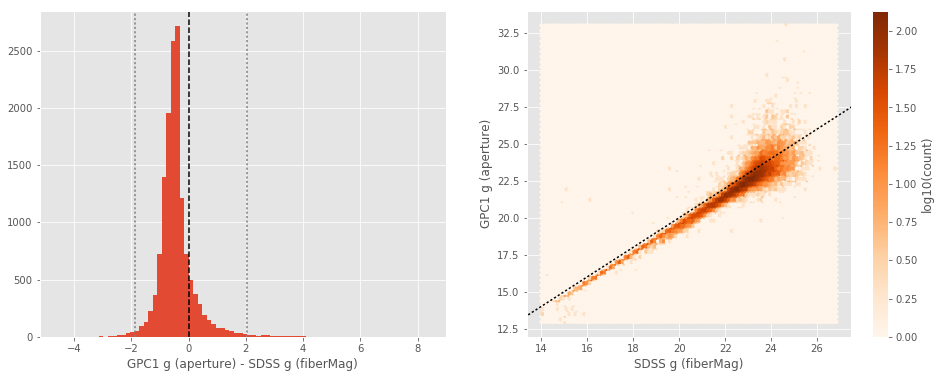

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.50
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8618568420410155
- 99% percentile: 2.050430297851558


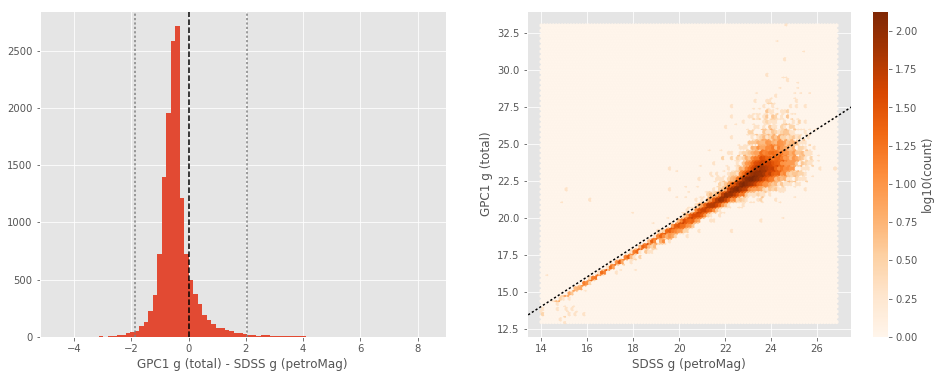

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9761717224121094
- 99% percentile: 0.31504284858703385


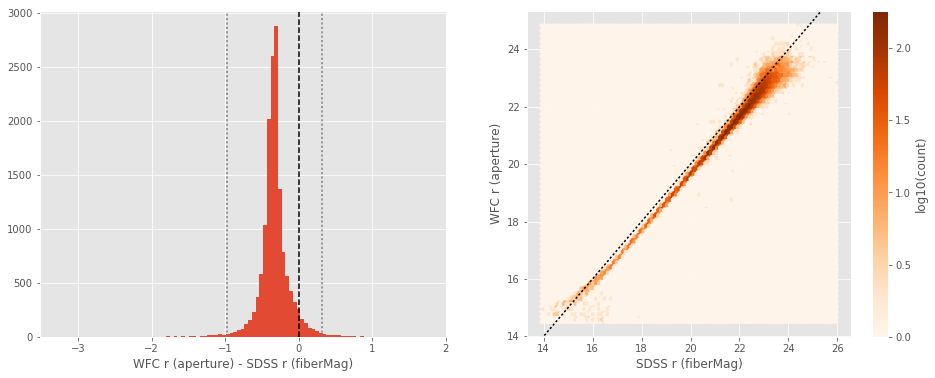

WFC r (total) - SDSS r (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9761717224121094
- 99% percentile: 0.31504284858703385


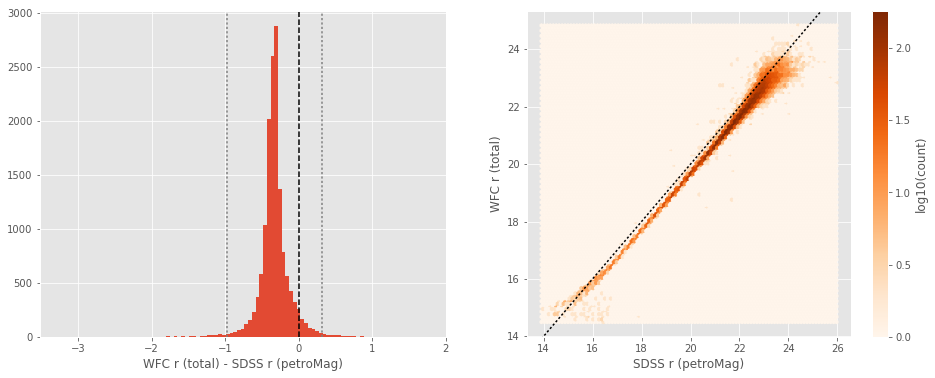

There are no overlapping magnitudes...
There are no overlapping magnitudes...
CFHT Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8356521606445313
- 99% percentile: 3.143560409545913


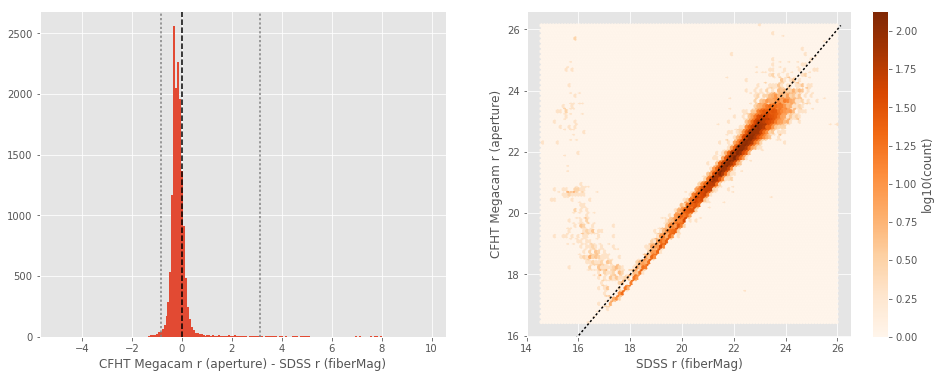

CFHT Megacam r (total) - SDSS r (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8356521606445313
- 99% percentile: 3.143560409545913


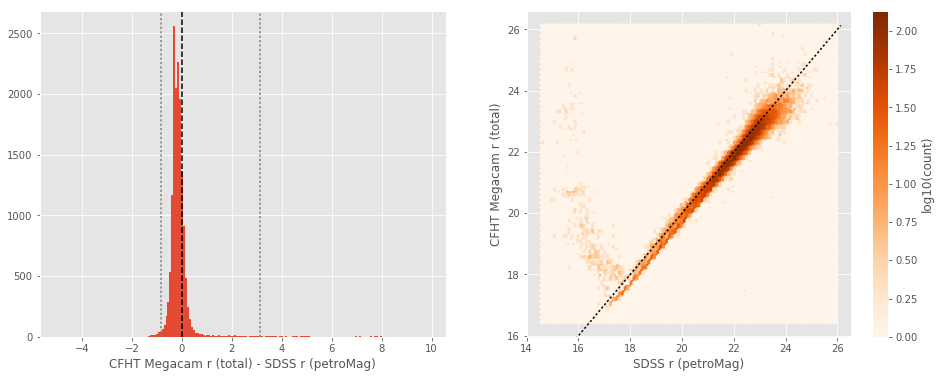

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2710792160034179
- 99% percentile: 1.012497673034668


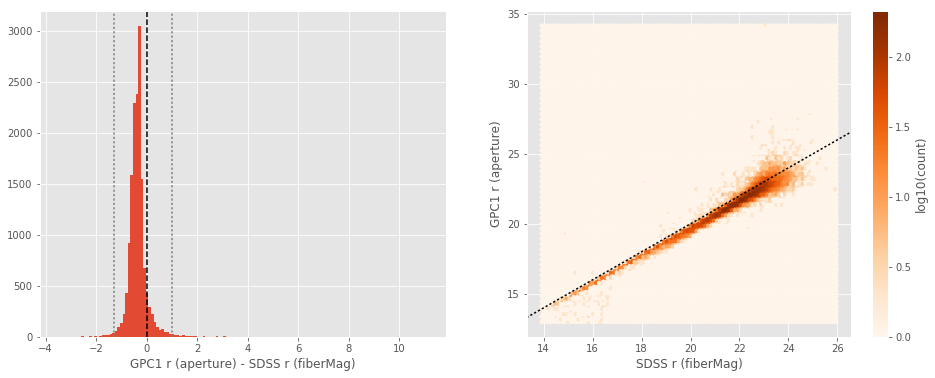

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2710792160034179
- 99% percentile: 1.012497673034668


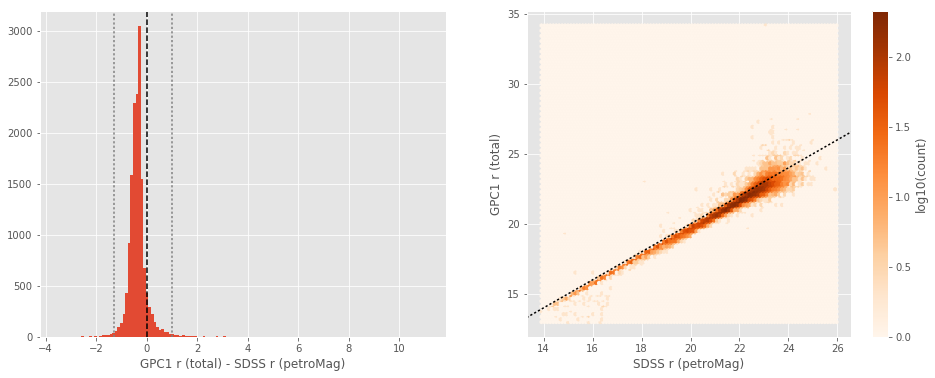

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -1.0136065864562989
- 99% percentile: 0.3811852645874021


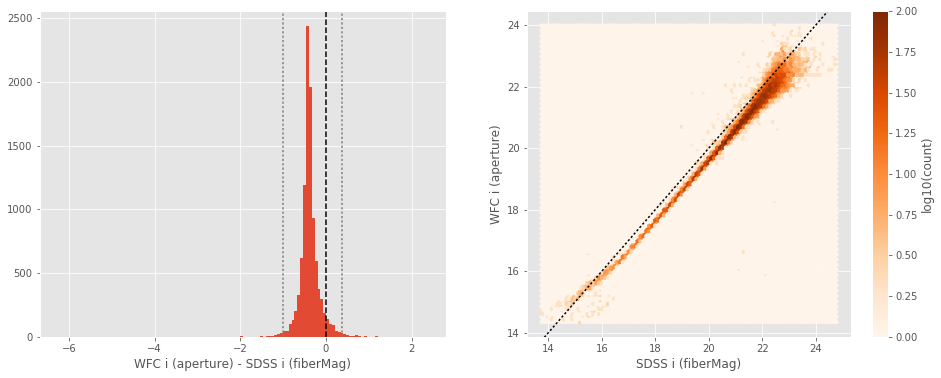

WFC i (total) - SDSS i (petroMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -1.0136065864562989
- 99% percentile: 0.3811852645874021


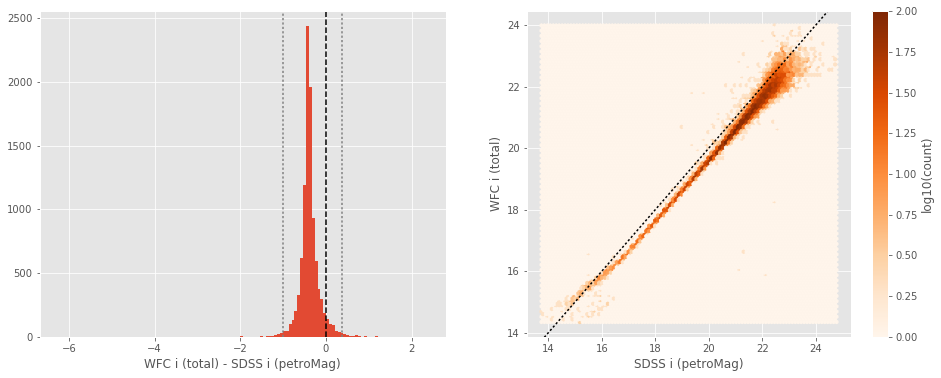

There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.39
- Median Absolute Deviation: 0.15
- 1% percentile: -1.153978157043457
- 99% percentile: 1.1241752624511692


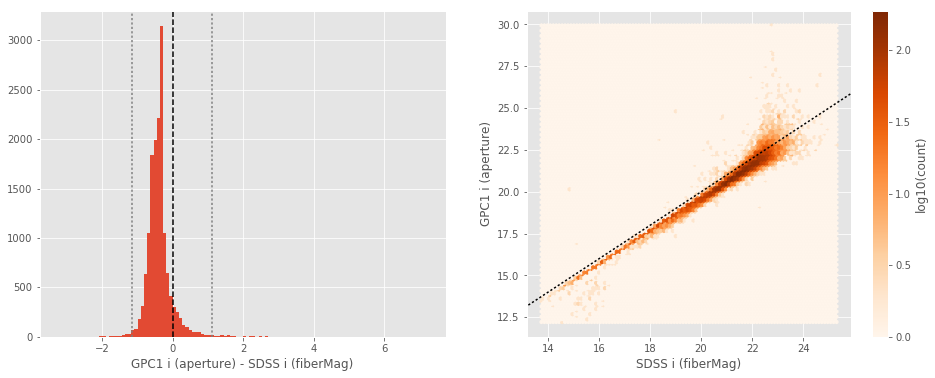

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.39
- Median Absolute Deviation: 0.15
- 1% percentile: -1.153978157043457
- 99% percentile: 1.1241752624511692


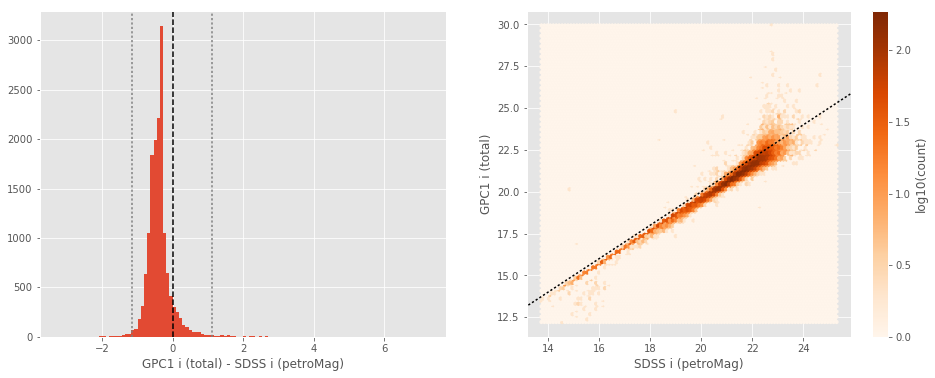

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
CFHT Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.11
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0401654052734375
- 99% percentile: 2.431620693206787


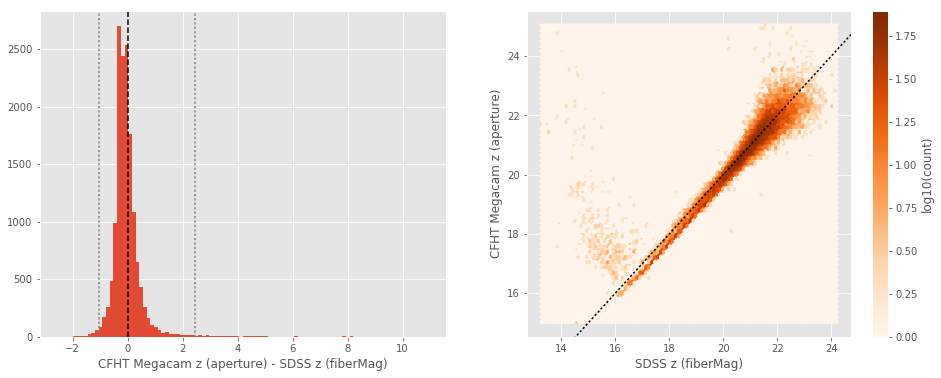

CFHT Megacam z (total) - SDSS z (petroMag):
- Median: -0.11
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0401654052734375
- 99% percentile: 2.431620693206787


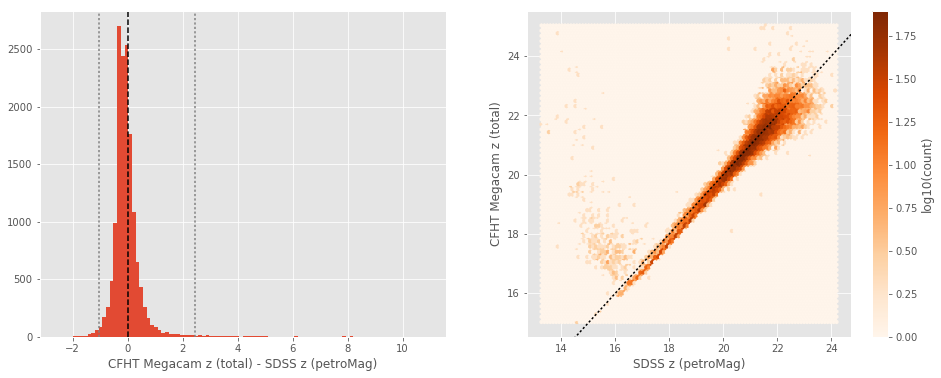

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.20
- 1% percentile: -1.3168160629272463
- 99% percentile: 1.9049944686889635


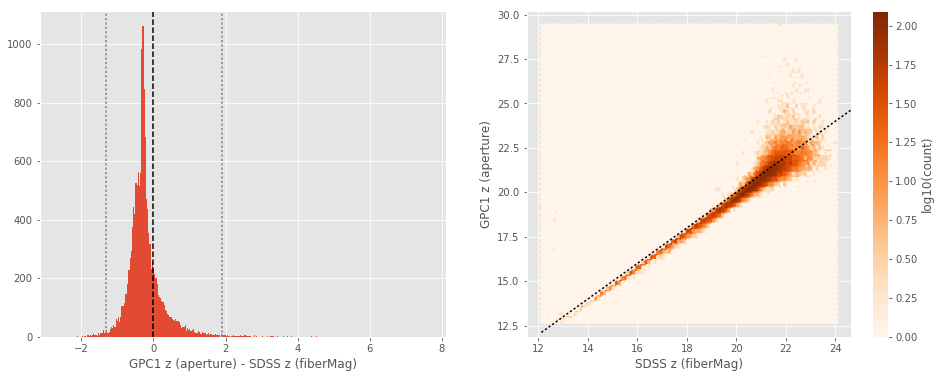

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.20
- 1% percentile: -1.3168160629272463
- 99% percentile: 1.9049944686889635


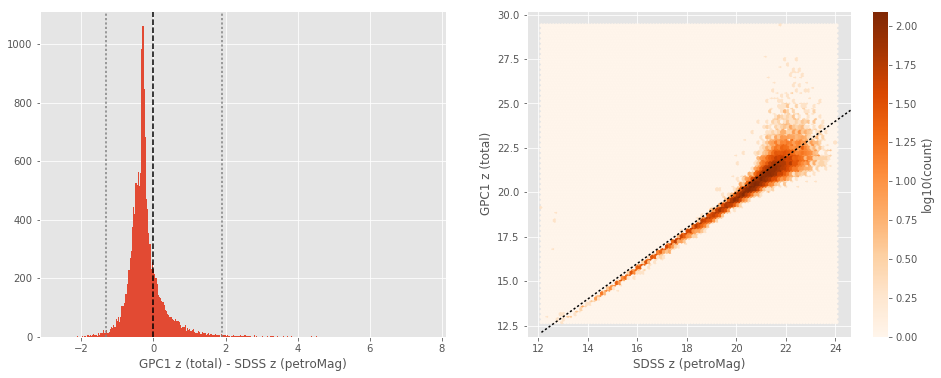

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Lockman-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.02
- Median Absolute Deviation: 0.05
- 1% percentile: -0.7892604264737921
- 99% percentile: 0.6602690993593399


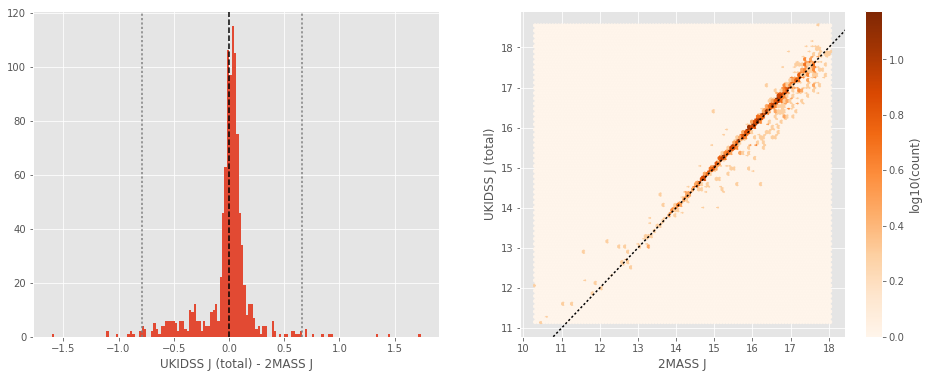

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.07
- Median Absolute Deviation: 0.08
- 1% percentile: -0.7804352815874627
- 99% percentile: 0.86948092141547


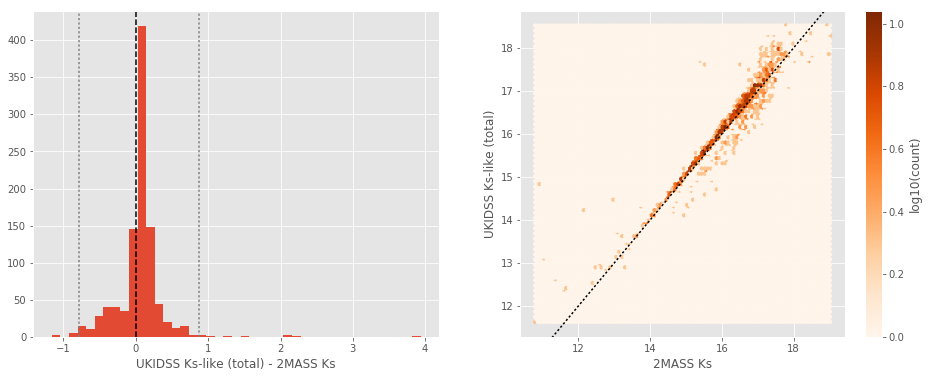

In [16]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 259763 / 489695 (53.05%)


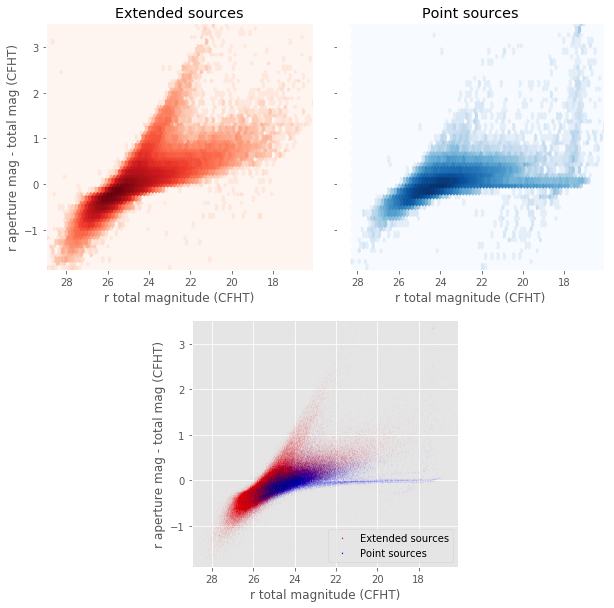

In [17]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_r'],
    master_catalogue['m_ap_cfht_megacam_r'] - master_catalogue['m_cfht_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 7536 / 489695 (1.54%)


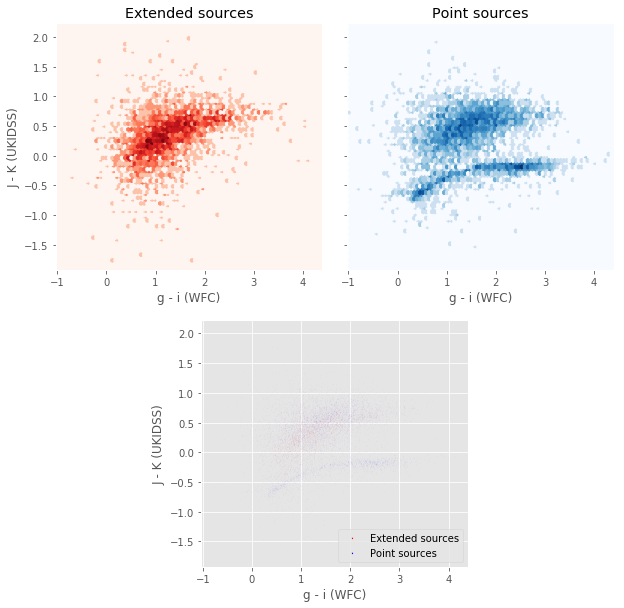

In [18]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (WFC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 7217 / 489695 (1.47%)


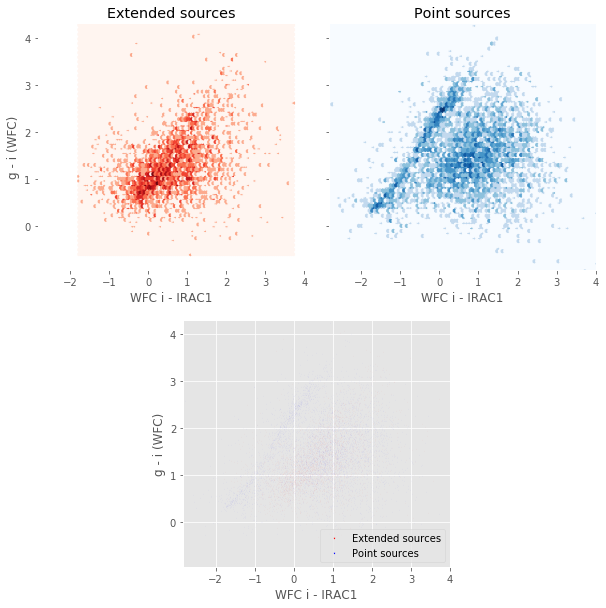

In [19]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 235732 / 489695 (48.14%)


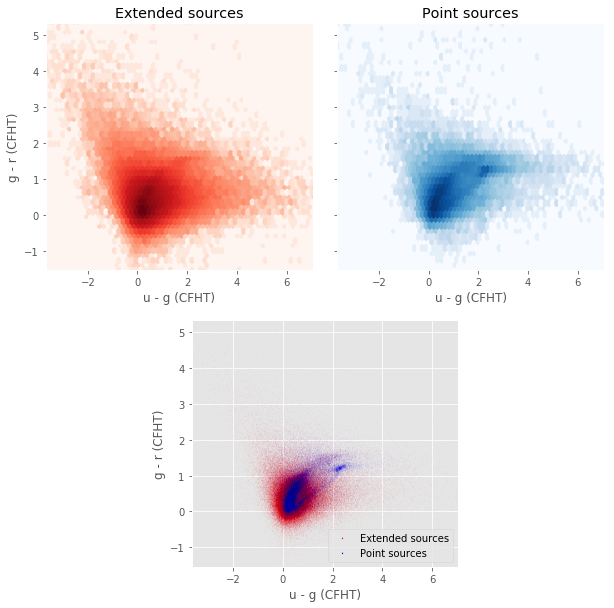

In [20]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_u'] - master_catalogue['m_cfht_megacam_g'],
    master_catalogue['m_cfht_megacam_g'] - master_catalogue['m_cfht_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 8947 / 489695 (1.83%)


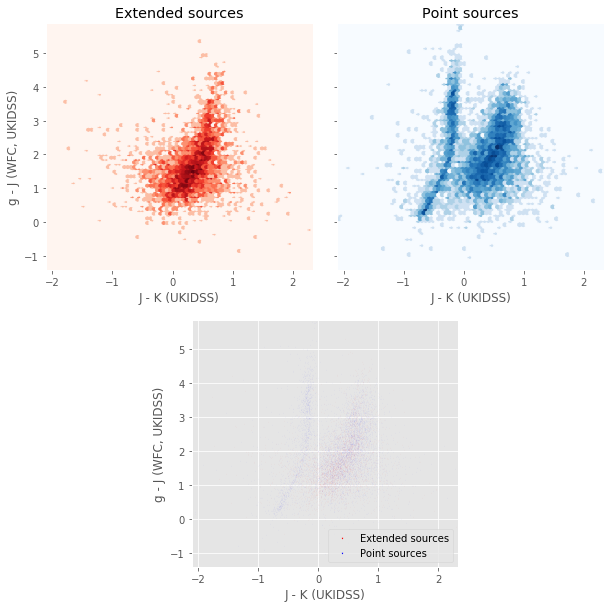

In [21]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (WFC, UKIDSS)",
    master_catalogue["stellarity"]
)

In [22]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_z'],
    master_catalogue['m_wfc_z'] - master_catalogue['m_ukidss_j'],
    "i - z (WFC)", "z - J (WFC, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 489695 (0.00%)
HELP warning: no sources with observations in both bands


Number of source used: 5427 / 489695 (1.11%)


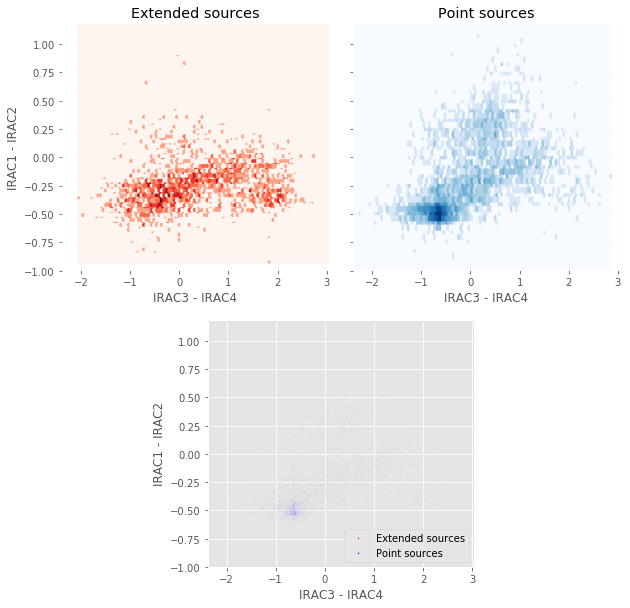

In [23]:
nb_ccplots(
    master_catalogue['m_irac3'] - master_catalogue['m_irac4'],
    master_catalogue['m_irac1'] - master_catalogue['m_irac2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)